In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.feature_selection import RFE, chi2
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns

In [316]:
df= pd.read_csv('C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\pca_preprocessed_data.csv')
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,-0.253788,1.108265,-0.700899,0.301111,0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,-0.809808,0.032225,0.344283,0.196894,0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,-0.323053,0.121233,0.142862,0.052773,-0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,0.610200,-0.081043,-0.617978,0.342487,0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,-0.884515,0.268812,0.469796,0.341791,-0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-0.271537,-1.102780,0.547618,-0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,0.690337,-0.198322,-0.710955,-0.726882,0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,0.756485,-0.672151,0.089254,-0.446223,-0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-1.331490,-0.178727,-0.341713,-0.655132,-0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [317]:
x= df.drop(columns=['condition','PC2'], axis=1)
y= df['condition']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y,)
 


In [318]:
RF_model =  RandomForestClassifier(random_state=42, class_weight='balanced', verbose=1, oob_score=True)
RF_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42,
                       verbose=1)

In [319]:
y_pred = RF_model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.88      1.00      0.93        28

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [320]:
importances = RF_model.feature_importances_
feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)



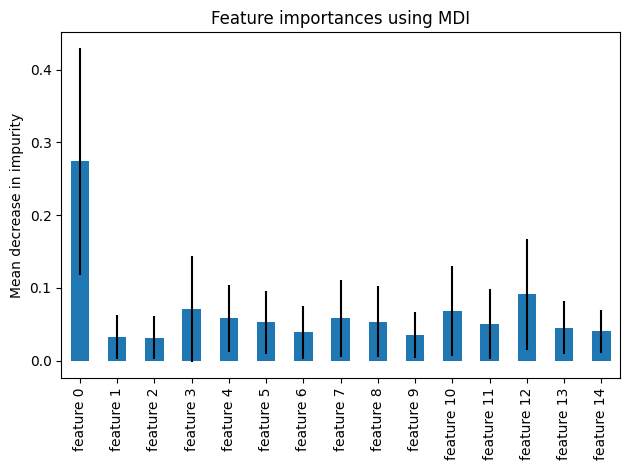

In [321]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [322]:
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
print(clf.feature_importances_)

[0.31031287 0.05463004 0.03337941 0.08703018 0.04987732 0.07840091
 0.02804162 0.0511345  0.0542785  0.03826292 0.02983339 0.07873301
 0.04491156 0.02217907 0.03899464]


In [323]:
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(x_train, y_train)
selector.support_


array([ True, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True])

In [324]:
selector.ranking_

array([1, 6, 5, 1, 1, 4, 1, 1, 3, 1, 1, 1, 2, 1, 1])

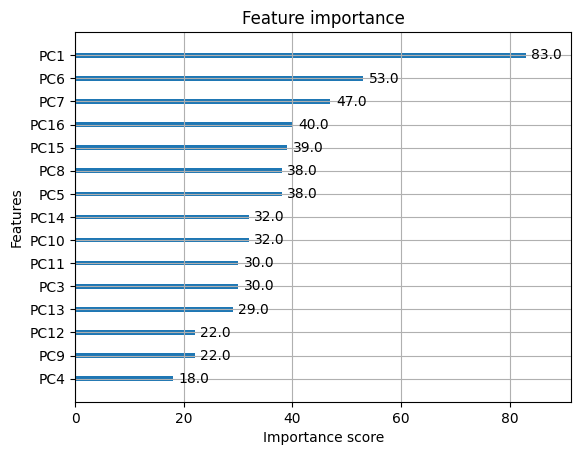

In [325]:
xgb.plot_importance(clf)
plt.show()

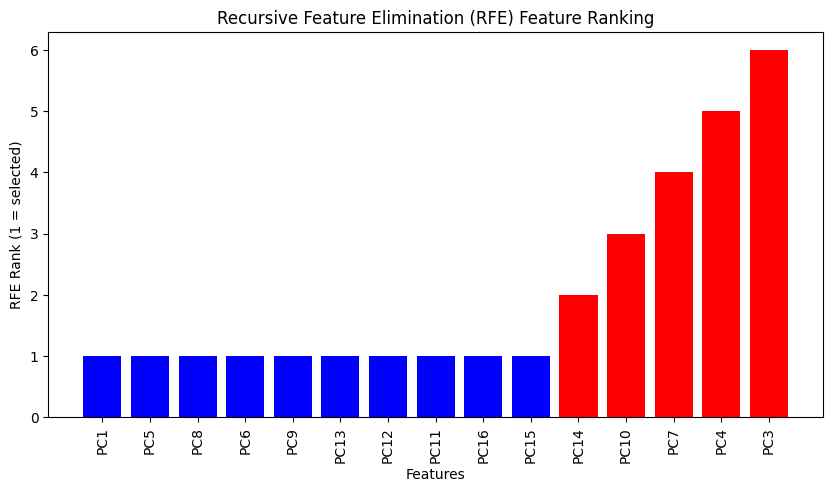

In [326]:
ranking = pd.DataFrame({
    "Feature": x_train.columns,
    "Rank": selector.ranking_
})

ranking["Selected"] = ranking["Rank"] == 1

ranking = ranking.sort_values("Rank")

plt.figure(figsize=(10,5))
colors = ["blue" if sel else "red" for sel in ranking["Selected"]]
plt.bar(ranking["Feature"], ranking["Rank"], color=colors)

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("RFE Rank (1 = selected)")
plt.title("Recursive Feature Elimination (RFE) Feature Ranking")
plt.show()


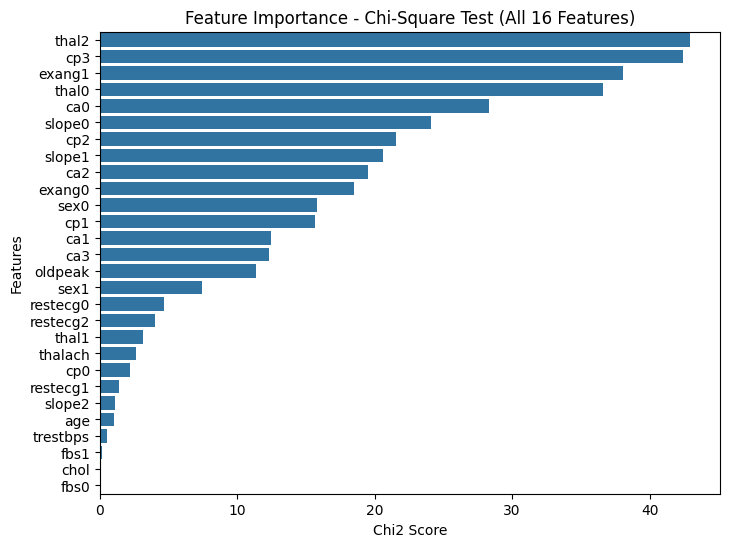

Chi2 Scores for all features:
thal2       42.958360
cp3         42.410097
exang1      38.052613
thal0       36.592219
ca0         28.315601
slope0      24.086540
cp2         21.551109
slope1      20.624160
ca2         19.509795
exang0      18.466709
sex0        15.785218
cp1         15.646367
ca1         12.461167
ca3         12.330323
oldpeak     11.382669
sex1         7.432845
restecg0     4.697130
restecg2     3.987845
thal1        3.133971
thalach      2.670638
cp0          2.208198
restecg1     1.366567
slope2       1.073891
age          1.005896
trestbps     0.532647
fbs1         0.164669
chol         0.111079
fbs0         0.028721
dtype: float64


In [327]:
temp = pd.read_csv('C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\preprocessed_data.csv')

x_temp = temp.drop(columns=['condition'])
y_temp = temp['condition']

chi2_selector = SelectKBest(score_func=chi2, k=16)
chi2_selector.fit(x_temp, y_temp)
chi2_scores = pd.Series(chi2_selector.scores_, index=x_temp.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=chi2_scores, y=chi2_scores.index)
plt.title("Feature Importance - Chi-Square Test (All 16 Features)")
plt.xlabel("Chi2 Score")
plt.ylabel("Features")
plt.show()

print("Chi2 Scores for all features:")
print(chi2_scores)

In [328]:
feature_selection_preprocessed_data =pd.concat([x, y], axis=1)
x = x.drop('PC3', axis=1)
feature_selection_preprocessed_data

,PC1,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,1.108265,-0.700899,0.301111,0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,0.032225,0.344283,0.196894,0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,0.121233,0.142862,0.052773,-0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,-0.081043,-0.617978,0.342487,0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,0.268812,0.469796,0.341791,-0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,-0.271537,-1.102780,0.547618,-0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,-0.198322,-0.710955,-0.726882,0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,-0.672151,0.089254,-0.446223,-0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-0.178727,-0.341713,-0.655132,-0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [329]:
feature_selection_preprocessed_data.to_csv('C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\feature_selection_preprocessed_data.csv', index=False)
